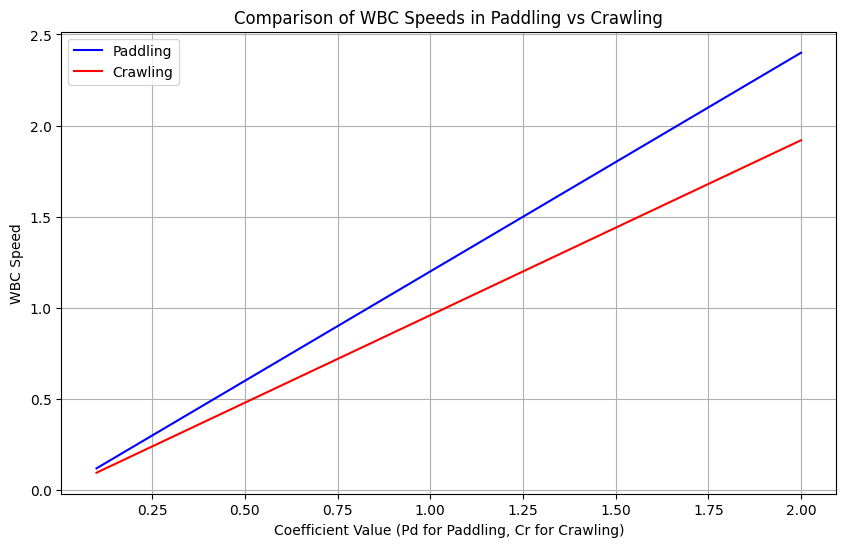

In [6]:
#RayDynamics Model, Partha Pratim Ray, https://scholar.google.com/citations?user=ioplfagAAAAJ&hl=en&oi=ao, August, 2023
#This code displays a plot showing how the WBC speed changes under different scenarios (by varying Pd and Cr). 
#It helps us to compare which mechanism results in faster speeds under different conditions.
#We'll vary the parameters Pd and Cr (coefficients for paddling and crawling) over a range to simulate various scenarios.
#The other influencing factors, such as s_w and S_surface (surface adhesion strength), will be kept constant for this simple comparison.
#We'll plot the resulting speeds for both mechanisms over the range of varying parameters.

import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
s_w_val = 1.2  # Assumed constant WBC speed factor for simplicity
Ssurface_val = 0.8  # Assumed constant surface adhesion strength

# Varying coefficients for paddling and crawling
Pd_values = np.linspace(0.1, 2, 100)  # Varying from 0.1 to 2 for illustration
Cr_values = np.linspace(0.1, 2, 100)  # Varying from 0.1 to 2 for illustration

# Compute speeds for both mechanisms
speeds_paddle = [model.vw_paddle(Pd, s_w_val) for Pd in Pd_values]
speeds_crawl = [model.vw_crawl(Cr, s_w_val, Ssurface_val) for Cr in Cr_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Pd_values, speeds_paddle, label="Paddling", color="blue")
plt.plot(Cr_values, speeds_crawl, label="Crawling", color="red")
plt.xlabel("Coefficient Value (Pd for Paddling, Cr for Crawling)")
plt.ylabel("WBC Speed")
plt.title("Comparison of WBC Speeds in Paddling vs Crawling")
plt.legend()
plt.grid(True)
plt.show()


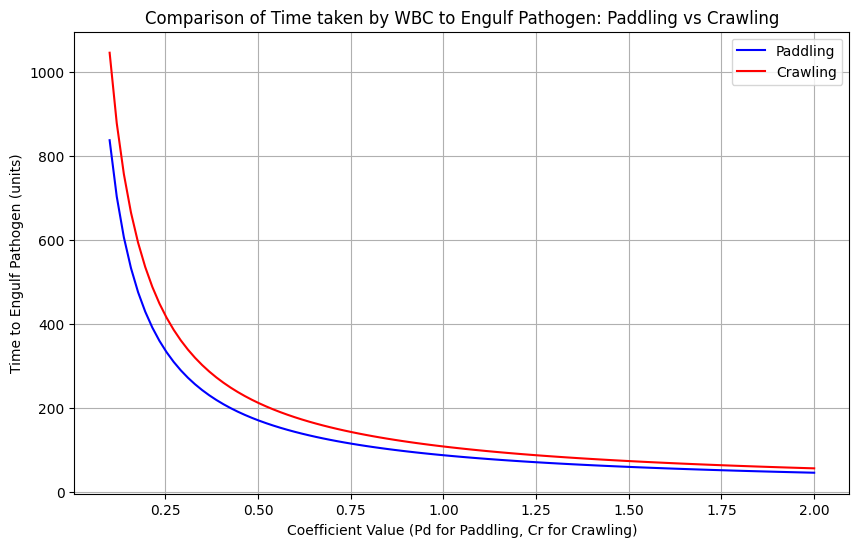

In [7]:
#To determine the time taken by the WBC to engulf a pathogen, we need to define some additional factors:

#Distance to the Pathogen: The distance that a WBC needs to travel to reach and engulf a pathogen. For this illustration, let's consider a constant distance, d = 100 units (you can change it as per your requirement).

#Engulfment Speed: How quickly the WBC engulfs the pathogen once it reaches it. This might differ slightly based on whether the WBC is crawling or paddling, but for the sake of simplicity, let's consider a constant value.

#Given that speed is distance over time (speed = distance/time), the time taken to reach the pathogen is time = distance/speed.


import numpy as np
import matplotlib.pyplot as plt

class RayDynamics:
    def __init__(self):
        # Initialize all constants
        self.k = [1 for _ in range(83)]  # We had constants k_1 to k_82 in the assumptions

    def vf(self, tau, eta, R, Pl):
        return self.k[1]*tau + self.k[2]*eta + self.k[3]*R + self.k[4]*Pl

    def delta_C(self, vf, C, D, P):
        return -np.gradient(vf*C) + D * np.gradient(C, 2) + P

    def dP_dt(self, P, vw, Ep):
        growth_rate = self.k[5]*P  # assumed linear growth rate
        return growth_rate - vw*Ep*P

    def sw(self, s0, eta, k):
        return s0 * np.exp(-eta*k)

    def dSp_dt(self, D, Sp, mu, P):
        return D * np.gradient(Sp, 2) - mu*Sp + P

    def Rd(self, Sp, WBC_receptors, eta):
        return self.k[9]*Sp + self.k[10]*WBC_receptors + self.k[11]*eta

    def dEp_dt(self, inflammation, shear_stress, C):
        return self.k[12]*inflammation + self.k[13]*shear_stress + self.k[14]*C

    def G(self, external_stimuli, t):
        return self.k[15]*external_stimuli + self.k[16]*t

    def Pm(self, G):
        return self.k[17]*G

    def I(self, previous_encounters, antigen_presentation, clonal_selection):
        return self.k[18]*previous_encounters + self.k[19]*antigen_presentation + self.k[20]*clonal_selection

    def Co(self, local_cell_density, signaling_molecules):
        return self.k[21]*local_cell_density + self.k[22]*signaling_molecules

    def Fp(self, sw, WBC_size, eta):
        return self.k[23]*sw + self.k[24]*WBC_size + self.k[25]*eta

    def ARBC(self, density, relative_velocity_RBCs):
        return self.k[26]*density + self.k[27]*relative_velocity_RBCs

    def APl(self, density, relative_velocity_Platelets):
        return self.k[28]*density + self.k[29]*relative_velocity_Platelets

    def AWBC(self, density, relative_velocity_WBCs):
        return self.k[30]*density + self.k[31]*relative_velocity_WBCs

    def T(self, extravascular_density, matrix_composition):
        return self.k[32]*extravascular_density + self.k[33]*matrix_composition

    def H(self, endocrine_factors, sw):
        return self.k[34]*endocrine_factors + self.k[35]*sw

    def M(self, past_infections, WBC_adaptation):
        return self.k[36]*past_infections + self.k[37]*WBC_adaptation

    def R(self, oxygen_levels, hemoglobin):
        return self.k[38]*oxygen_levels + self.k[39]*hemoglobin

    def Pl(self, injury_sites, coagulation_factors):
        return self.k[40]*injury_sites + self.k[41]*coagulation_factors

    def vw_paddle(self, Pd, sw):
        return self.k[42]*Pd*sw

    def vw_crawl(self, Cr, sw, Ssurface):
        return self.k[43]*Cr*sw*Ssurface

    def aw(self, Mw, Rd, d_adj):
        return self.k[44]*Mw + self.k[45]*Rd + self.k[46]*d_adj

    def Mw(self, internal_properties, B):
        return self.k[47]*internal_properties + self.k[48]*B

    def d_adj(self, distance_to_obstacle, vf, Mw):
        return self.k[49]/distance_to_obstacle + self.k[50]*vf + self.k[51]*Mw

    def B(self, H, Co, other_factors):
        return self.k[52]*H + self.k[53]*Co + self.k[54]*other_factors

# Initialize the model
model = RayDynamics()

# Parameters for simulation
s_w_val = 1.2  # Assumed constant WBC speed factor for simplicity
Ssurface_val = 0.8  # Assumed constant surface adhesion strength
distance_to_pathogen = 100  # Assumed constant distance to pathogen for simplicity
engulfment_time = 5  # Assumed time taken to engulf the pathogen once reached

# Varying coefficients for paddling and crawling
Pd_values = np.linspace(0.1, 2, 100)  # Varying from 0.1 to 2 for illustration
Cr_values = np.linspace(0.1, 2, 100)  # Varying from 0.1 to 2 for illustration

# Compute times for both mechanisms
times_paddle = [distance_to_pathogen / model.vw_paddle(Pd, s_w_val) + engulfment_time for Pd in Pd_values]
times_crawl = [distance_to_pathogen / model.vw_crawl(Cr, s_w_val, Ssurface_val) + engulfment_time for Cr in Cr_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(Pd_values, times_paddle, label="Paddling", color="blue")
plt.plot(Cr_values, times_crawl, label="Crawling", color="red")
plt.xlabel("Coefficient Value (Pd for Paddling, Cr for Crawling)")
plt.ylabel("Time to Engulf Pathogen (units)")
plt.title("Comparison of Time taken by WBC to Engulf Pathogen: Paddling vs Crawling")
plt.legend()
plt.grid(True)
plt.show()
